# Data Cleaning & Preprocessing

## 1. Load Dataset & Libraries

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/colby/OneDrive/Documents/SCMS_Delivery_History_Dataset_20150929.csv", encoding="ISO-8859-1")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## 2. Check for Missing Values

In [2]:
print(df.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

## 3. Clean Missing Values & Convert Data Types 

In [3]:
df['Shipment Mode'].fillna("Unknown", inplace=True)
df['Dosage'].fillna("Unknown", inplace=True)
    
df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].median(), inplace=True)

date_columns = [
    "PQ First Sent to Client Date",
    "PO Sent to Vendor Date",
    "Scheduled Delivery Date",
    "Delivered to Client Date",
    "Delivery Recorded Date"
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                  

In [4]:
unique_counts = df.nunique().sort_values(ascending=False)
print("\nUnique Values per Column:")
print(unique_counts)


Unique Values per Column:
ID                              10324
Line Item Value                  8741
ASN/DN #                         7030
Line Item Insurance (USD)        6722
PO / SO #                        6233
Freight Cost (USD)               5432
Line Item Quantity               5065
Weight (Kilograms)               3388
Delivered to Client Date         2093
Delivery Recorded Date           2042
Scheduled Delivery Date          2006
PQ #                             1237
Pack Price                       1175
PO Sent to Vendor Date            895
PQ First Sent to Client Date      763
Item Description                  184
Unit Price                        183
Project Code                      142
Manufacturing Site                 88
Molecule/Test Type                 86
Vendor                             73
Dosage                             55
Brand                              48
Country                            43
Unit of Measure (Per Pack)         31
Dosage Form            

## 4. Drop Irrelevant or Redundant Columns

In [5]:
columns_to_drop = [
    "ID", "PQ #", "PO / SO #", "ASN/DN #",
    "Item Description", "Line Item Insurance (USD)", "Managed By", "Dosage Form", "Dosage", "Molecule/Test Type", "Project Code", 
]

df.drop(columns=columns_to_drop, inplace=True)

df.head()

,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,...,Brand,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD)
0,Côte d'Ivoire,Direct Drop,EXW,Air,NaT,NaT,2006-06-02,2006-06-02,2006-06-02,HRDT,...,Reveal,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34
1,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-11-14,2006-11-14,2006-11-14,ARV,...,Generic,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50
2,Côte d'Ivoire,Direct Drop,FCA,Air,NaT,NaT,2006-08-27,2006-08-27,2006-08-27,HRDT,...,Determine,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78
3,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-09-01,2006-09-01,2006-09-01,ARV,...,Generic,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06
4,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-08-11,2006-08-11,2006-08-11,ARV,...,Generic,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08


In [6]:
columns_to_drop1 = [
    "Brand", "First Line Designation", "Unit of Measure (Per Pack)",
    "Pack Price", "Unit Price"
]

df.drop(columns=columns_to_drop1, inplace=True)

In [7]:
df.head()

,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Line Item Quantity,Line Item Value,Manufacturing Site,Weight (Kilograms),Freight Cost (USD)
0,Côte d'Ivoire,Direct Drop,EXW,Air,NaT,NaT,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,19,551.0,Ranbaxy Fine Chemicals LTD,13.0,780.34
1,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,1000,6200.0,"Aurobindo Unit III, India",358.0,4521.50
2,Côte d'Ivoire,Direct Drop,FCA,Air,NaT,NaT,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,500,40000.0,ABBVIE GmbH & Co.KG Wiesbaden,171.0,1653.78
3,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,31920,127360.8,"Ranbaxy, Paonta Shahib, India",1855.0,16007.06
4,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,38000,121600.0,"Aurobindo Unit III, India",7590.0,45450.08


## 5. Create Target & Impute Missing Values w/ Median

In [8]:
df["Delivery Delay (Days)"] = (df["Delivered to Client Date"] - df["Scheduled Delivery Date"]).dt.days

df["Delayed"] = (df["Delivery Delay (Days)"] > 0).astype(int)

df["Weight (Kilograms)"].fillna(df["Weight (Kilograms)"].median(), inplace=True)
df["Freight Cost (USD)"].fillna(df["Freight Cost (USD)"].median(), inplace=True)

df.dropna(subset=["Scheduled Delivery Date", "Delivered to Client Date"], inplace=True)

for col in ["PQ First Sent to Client Date", "PO Sent to Vendor Date"]:
    df[col].fillna(pd.Timestamp("2000-01-01"), inplace=True)
    
print(df.isnull().sum())

Country                         0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Line Item Quantity              0
Line Item Value                 0
Manufacturing Site              0
Weight (Kilograms)              0
Freight Cost (USD)              0
Delivery Delay (Days)           0
Delayed                         0
dtype: int64


In [13]:
from IPython.display import HTML, Javascript
HTML('''
    <script>
        $('div.cell.code_cell:has(div.input_area:contains("hide_input"))').hide();
    </script>
''')


In [11]:
from IPython.display import HTML, Javascript
HTML('''
    <script>
        $('div.cell.code_cell:has(div.input_area:contains("hide_input"))').hide();
    </script>
''')


In [19]:
from IPython.display import HTML, Javascript
HTML('''
    <script>
        $('div.cell.code_cell:has(div.input_area:contains("hide_input"))').hide();
    </script>
''')

In [18]:
from IPython.display import HTML, Javascript
HTML('''
    <script>
        $('div.cell.code_cell:has(div.input_area:contains("hide_input"))').hide();
    </script>
''')

median_pq_date = df["PQ First Sent to Client Date"].median()
df["PQ First Sent to Client Date"].fillna(median_pq_date, inplace=True)

median_po_date = df["PO Sent to Vendor Date"].median()
df["PO Sent to Vendor Date"].fillna(median_po_date, inplace=True)

df.loc[df["PQ First Sent to Client Date"] == pd.Timestamp("2000-01-01"), "PQ First Sent to Client Date"] = pd.NaT
df.loc[df["PO Sent to Vendor Date"] == pd.Timestamp("2000-01-01"), "PO Sent to Vendor Date"] = pd.NaT

df.to_csv("SCMS_Cleaned_PQ_First_Sent.csv", index=False)

df["PQ First Sent to Client Date"] = pd.to_datetime(df["PQ First Sent to Client Date"], errors='coerce')
df["PO Sent to Vendor Date"] = pd.to_datetime(df["PO Sent to Vendor Date"], errors='coerce')

df["Processing Time (Days)"] = (df["PO Sent to Vendor Date"] - df["PQ First Sent to Client Date"]).dt.days

df["Processing Time (Days)"].fillna(24, inplace=True)

df.to_csv("SCMS_With_Processing_Time.csv", index=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Country                       10324 non-null  object        
 1   Fulfill Via                   10324 non-null  object        
 2   Vendor INCO Term              10324 non-null  object        
 3   Shipment Mode                 10324 non-null  object        
 4   PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 5   PO Sent to Vendor Date        4592 non-null   datetime64[ns]
 6   Scheduled Delivery Date       10324 non-null  datetime64[ns]
 7   Delivered to Client Date      10324 non-null  datetime64[ns]
 8   Delivery Recorded Date        10324 non-null  datetime64[ns]
 9   Product Group                 10324 non-null  object        
 10  Sub Classification            10324 non-null  object        
 11  Vendor                      

## 6. Feature Engineering

In [16]:
df["Delivery Quarter"] = df["Scheduled Delivery Date"].dt.quarter

In [17]:
df["Freight Cost per KG"] = df["Freight Cost (USD)"] / df["Weight (Kilograms)"]

df.head()

,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,...,Line Item Quantity,Line Item Value,Manufacturing Site,Weight (Kilograms),Freight Cost (USD),Delivery Delay (Days),Delayed,Processing Time (Days),Delivery Quarter,Freight Cost per KG
0,Côte d'Ivoire,Direct Drop,EXW,Air,NaT,NaT,2006-06-02,2006-06-02,2006-06-02,HRDT,...,19,551.0,Ranbaxy Fine Chemicals LTD,13.0,780.34,0,0,24.0,2,60.026154
1,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-11-14,2006-11-14,2006-11-14,ARV,...,1000,6200.0,"Aurobindo Unit III, India",358.0,4521.50,0,0,24.0,4,12.629888
2,Côte d'Ivoire,Direct Drop,FCA,Air,NaT,NaT,2006-08-27,2006-08-27,2006-08-27,HRDT,...,500,40000.0,ABBVIE GmbH & Co.KG Wiesbaden,171.0,1653.78,0,0,24.0,3,9.671228
3,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-09-01,2006-09-01,2006-09-01,ARV,...,31920,127360.8,"Ranbaxy, Paonta Shahib, India",1855.0,16007.06,0,0,24.0,3,8.629143
4,Vietnam,Direct Drop,EXW,Air,NaT,NaT,2006-08-11,2006-08-11,2006-08-11,ARV,...,38000,121600.0,"Aurobindo Unit III, India",7590.0,45450.08,0,0,24.0,3,5.988153


In [18]:
features_to_drop = [
    "PQ First Sent to Client Date", "PO Sent to Vendor Date", "Scheduled Delivery Date", "Delivered to Client Date", "Delivery Recorded Date"
]
    
df.drop(columns=features_to_drop, inplace=True)
df.head()

,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,Line Item Quantity,Line Item Value,Manufacturing Site,Weight (Kilograms),Freight Cost (USD),Delivery Delay (Days),Delayed,Processing Time (Days),Delivery Quarter,Freight Cost per KG
0,Côte d'Ivoire,Direct Drop,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,19,551.0,Ranbaxy Fine Chemicals LTD,13.0,780.34,0,0,24.0,2,60.026154
1,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,1000,6200.0,"Aurobindo Unit III, India",358.0,4521.50,0,0,24.0,4,12.629888
2,Côte d'Ivoire,Direct Drop,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,500,40000.0,ABBVIE GmbH & Co.KG Wiesbaden,171.0,1653.78,0,0,24.0,3,9.671228
3,Vietnam,Direct Drop,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,31920,127360.8,"Ranbaxy, Paonta Shahib, India",1855.0,16007.06,0,0,24.0,3,8.629143
4,Vietnam,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,38000,121600.0,"Aurobindo Unit III, India",7590.0,45450.08,0,0,24.0,3,5.988153


## 7. One-Hot Encoding Specified Variables

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

one_hot_cols = ["Fulfill Via", "Shipment Mode", "Vendor INCO Term", "Country", "Product Group", "Delivery Quarter"]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 78 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sub Classification               10324 non-null  object 
 1   Vendor                           10324 non-null  object 
 2   Line Item Quantity               10324 non-null  int64  
 3   Line Item Value                  10324 non-null  float64
 4   Manufacturing Site               10324 non-null  object 
 5   Weight (Kilograms)               10324 non-null  float64
 6   Freight Cost (USD)               10324 non-null  float64
 7   Delivery Delay (Days)            10324 non-null  int64  
 8   Delayed                          10324 non-null  int32  
 9   Processing Time (Days)           10324 non-null  float64
 10  Freight Cost per KG              10324 non-null  float64
 11  Fulfill Via_Direct Drop          10324 non-null  uint8  
 12  Fulfill Via_From R

In [21]:
 df.drop(columns=["Sub Classification", "Delivery Delay (Days)", "Manufacturing Site", ], inplace=True)

## 8. Frequency Encoding for Vendor

In [21]:
vendor_counts = df["Vendor"].value_counts()
df["Vendor_encoded"] = df["Vendor"].map(vendor_counts)

df = df.drop(columns=["Vendor"], errors="ignore")

print(df[["Vendor_encoded"]].head())

   Vendor_encoded
0               2
1             668
2              21
3               9
4             668


In [22]:
processed_file_path = "C:/Users/colby/OneDrive/Documents/SCMS_Encoded1.csv"
df.to_csv(processed_file_path, index=False)

## 9. Identify & Drop Highly Correlated/Redundant Variables

C:\Users\colby\AppData\Local\Temp\ipykernel_22020\176219214.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


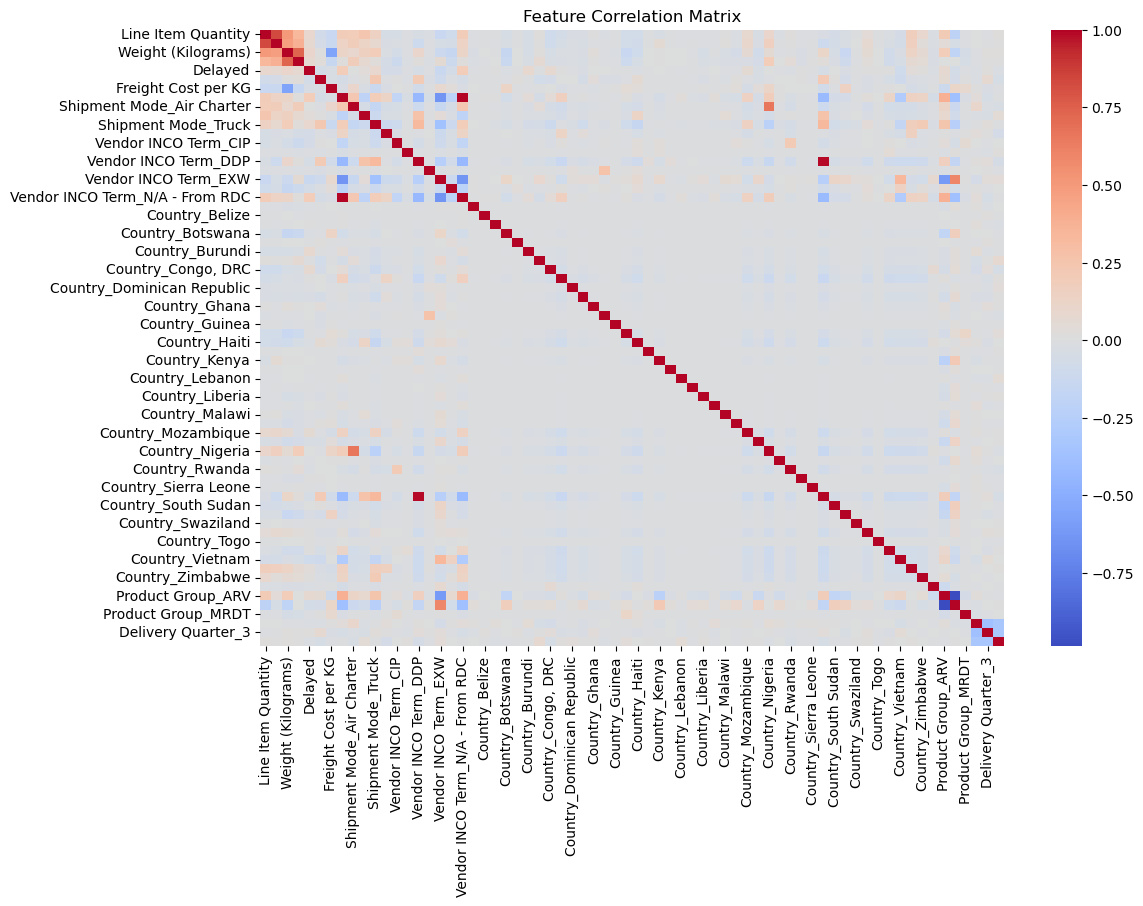

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [60]:
correlation_threshold = 0.5
correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

correlated_df = pd.DataFrame(correlated_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
print("Highly Correlated Feature Pairs:")
print(correlated_df)


Highly Correlated Feature Pairs:
                          Feature 1                  Feature 2  Correlation
0                   Line Item Value         Line Item Quantity     0.830031
1                Freight Cost (USD)         Weight (Kilograms)     0.729182
2               Freight Cost per KG         Weight (Kilograms)    -0.554136
3              Vendor INCO Term_EXW       Fulfill Via_From RDC    -0.635891
4   Vendor INCO Term_N/A - From RDC       Fulfill Via_From RDC     1.000000
5   Vendor INCO Term_N/A - From RDC       Vendor INCO Term_EXW    -0.635891
6                   Country_Nigeria  Shipment Mode_Air Charter     0.664410
7              Country_South Africa       Vendor INCO Term_DDP     0.985046
8                 Product Group_ARV       Vendor INCO Term_EXW    -0.605989
9                Product Group_HRDT       Vendor INCO Term_EXW     0.595026
10               Product Group_HRDT          Product Group_ARV    -0.984306


In [61]:
features_to_drop2 = [
    "Line Item Value", 
    "Freight Cost per KG",  
    "Fulfill Via_From RDC", 
    "Vendor INCO Term_N/A - From RDC", 
    "Country_Nigeria",  
    "Country_South Africa",
    "Vendor INCO Term_EXW",  
    "Product Group_HRDT"  
]

df.drop(columns=features_to_drop2, inplace=True)


In [32]:
df.head()

,Vendor,Line Item Quantity,Weight (Kilograms),Delayed,Processing Time (Days),Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Shipment Mode_Unknown,Vendor INCO Term_CIP,...,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Product Group_ANTM,Product Group_ARV,Product Group_MRDT,Delivery Quarter_2,Delivery Quarter_3,Delivery Quarter_4
0,RANBAXY Fine Chemicals LTD.,0.000086,0.101407,0,0.473844,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Aurobindo Pharma Limited,0.005335,0.489688,0,0.473844,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,Abbott GmbH & Co. KG,0.002659,0.401623,0,0.473844,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,0.170783,0.686309,0,0.473844,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,Aurobindo Pharma Limited,0.203317,0.854887,0,0.473844,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
